In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd
import numpy as np
import os
import warnings
warnings.filterwarnings('ignore')

In [24]:
def load_and_merge_data():
    MSDData = pd.read_csv("mental-and-substance-use-as-share-of-disease.csv")
    PMSDData = pd.read_csv("prevalence-by-mental-and-substance-use-disorder.csv")

    # Merge the two DataFrames
    data = pd.merge(MSDData, PMSDData)
    # Drop the 'Code' column from the DataFrame
    data.drop('Code', axis=1, inplace=True)
    return data

In [25]:
def preprocess_data(data):
    # Rename the columns for clarity
    data.set_axis(['Country', 'Year', 'Schizophrenia', 'Bipolar_disorder', 'Eating_disorder', 'Anxiety', 'drug_usage', 'depression', 'alcohol', 'mental_fitness'], axis='columns', inplace=True)

    # Label encode categorical columns
    from sklearn.preprocessing import LabelEncoder
    l = LabelEncoder()
    for i in data.columns:
        if data[i].dtype == 'object':
            data[i] = l.fit_transform(data[i])
    return data

In [26]:
def visualize_data(data):
    # Visualize the correlation between features using a heatmap
    plt.figure(figsize=(12, 6))
    sns.heatmap(data.corr(), annot=True, cmap='Blues')
    plt.show()

    # Plot a jointplot with regression line for 'Schizophrenia' and 'mental_fitness'
    sns.jointplot(x='Schizophrenia', y='mental_fitness', data=data, kind='reg', color='m')
    plt.show()

    # Plot a jointplot with regression line for 'Bipolar_disorder' and 'mental_fitness'
    sns.jointplot(x='Bipolar_disorder', y='mental_fitness', data=data, kind='reg', color='blue')
    plt.show()

    # Plot a pairplot for all numerical features
    sns.pairplot(data, corner=True)
    plt.show()

    # Calculate the mean of the 'mental_fitness' column
    mean = data['mental_fitness'].mean()
    print(mean)

    # Visualize the distribution of 'mental_fitness' over the years using a pie chart
    fig = px.pie(data, values='mental_fitness', names='Year')
    fig.show()

    # Visualize the top 10 countries with their 'mental_fitness' values over the years using a bar chart
    fig = px.bar(data.head(10), x='Year', y='mental_fitness', color='Year', template='ggplot2')
    fig.show()

    # Visualize the trend of 'mental_fitness' over the years for each country using a line chart
    fig = px.line(data, x="Year", y="mental_fitness", color='Country', markers=True, color_discrete_sequence=['green', 'yellow'], template='plotly_dark')
    fig.show()

In [27]:
def evaluate_model(X, y, model):
    # Split the data into training and testing sets
    from sklearn.model_selection import train_test_split
    xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=2)
    model.fit(xtrain, ytrain)

    # Model evaluation for training set
    ytrain_pred = model.predict(xtrain)
    mse = mean_squared_error(ytrain, ytrain_pred)
    rmse = (np.sqrt(mean_squared_error(ytrain, ytrain_pred)))
    r2 = r2_score(ytrain, ytrain_pred)
    print(f"{type(model).__name__} Model Performance for Training Set")
    print("--------------------------------------")
    print('MSE is {}'.format(mse))
    print('RMSE is {}'.format(rmse))
    print('R2 score is {}'.format(r2))
    print("\n")

    # Model evaluation for testing set
    ytest_pred = model.predict(xtest)
    mse = mean_squared_error(ytest, ytest_pred)
    rmse = (np.sqrt(mean_squared_error(ytest, ytest_pred)))
    r2 = r2_score(ytest, ytest_pred)
    print(f"{type(model).__name__} Model Performance for Testing Set")
    print("--------------------------------------")
    print('MSE is {}'.format(mse))
    print('RMSE is {}'.format(rmse))
    print('R2 score is {}'.format(r2))

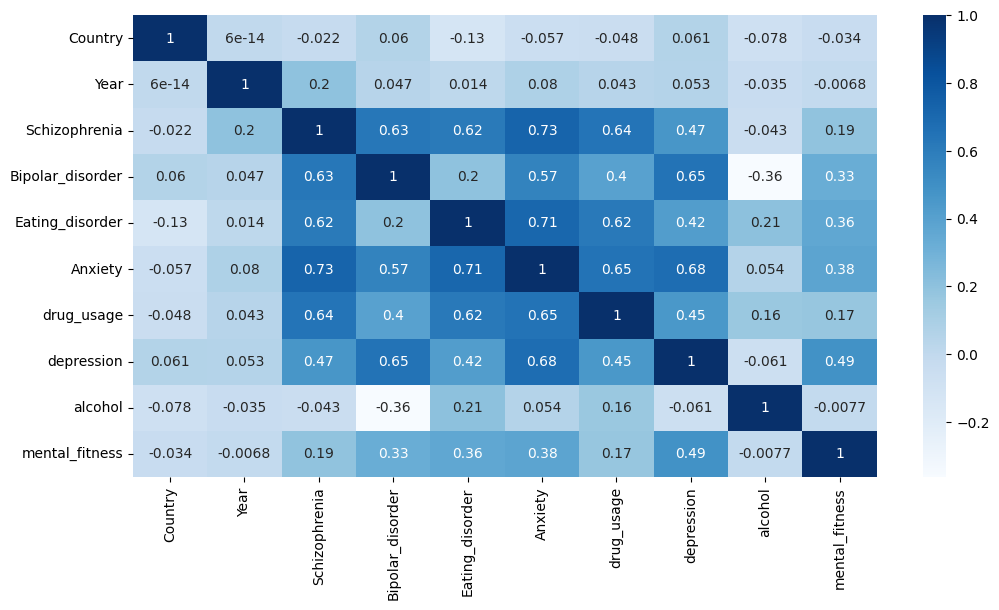

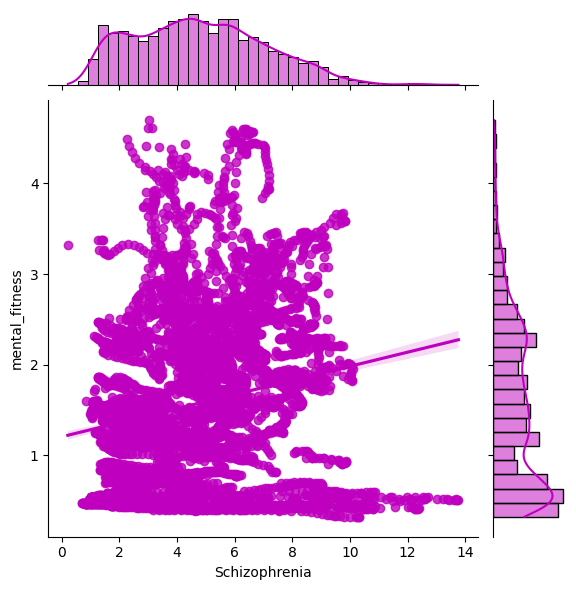

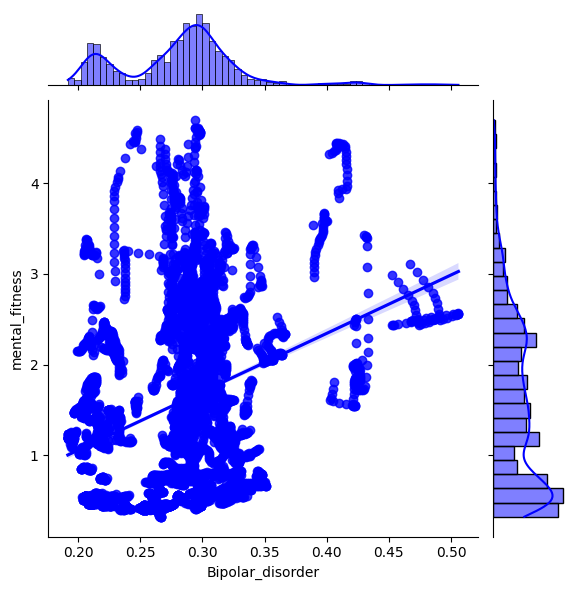

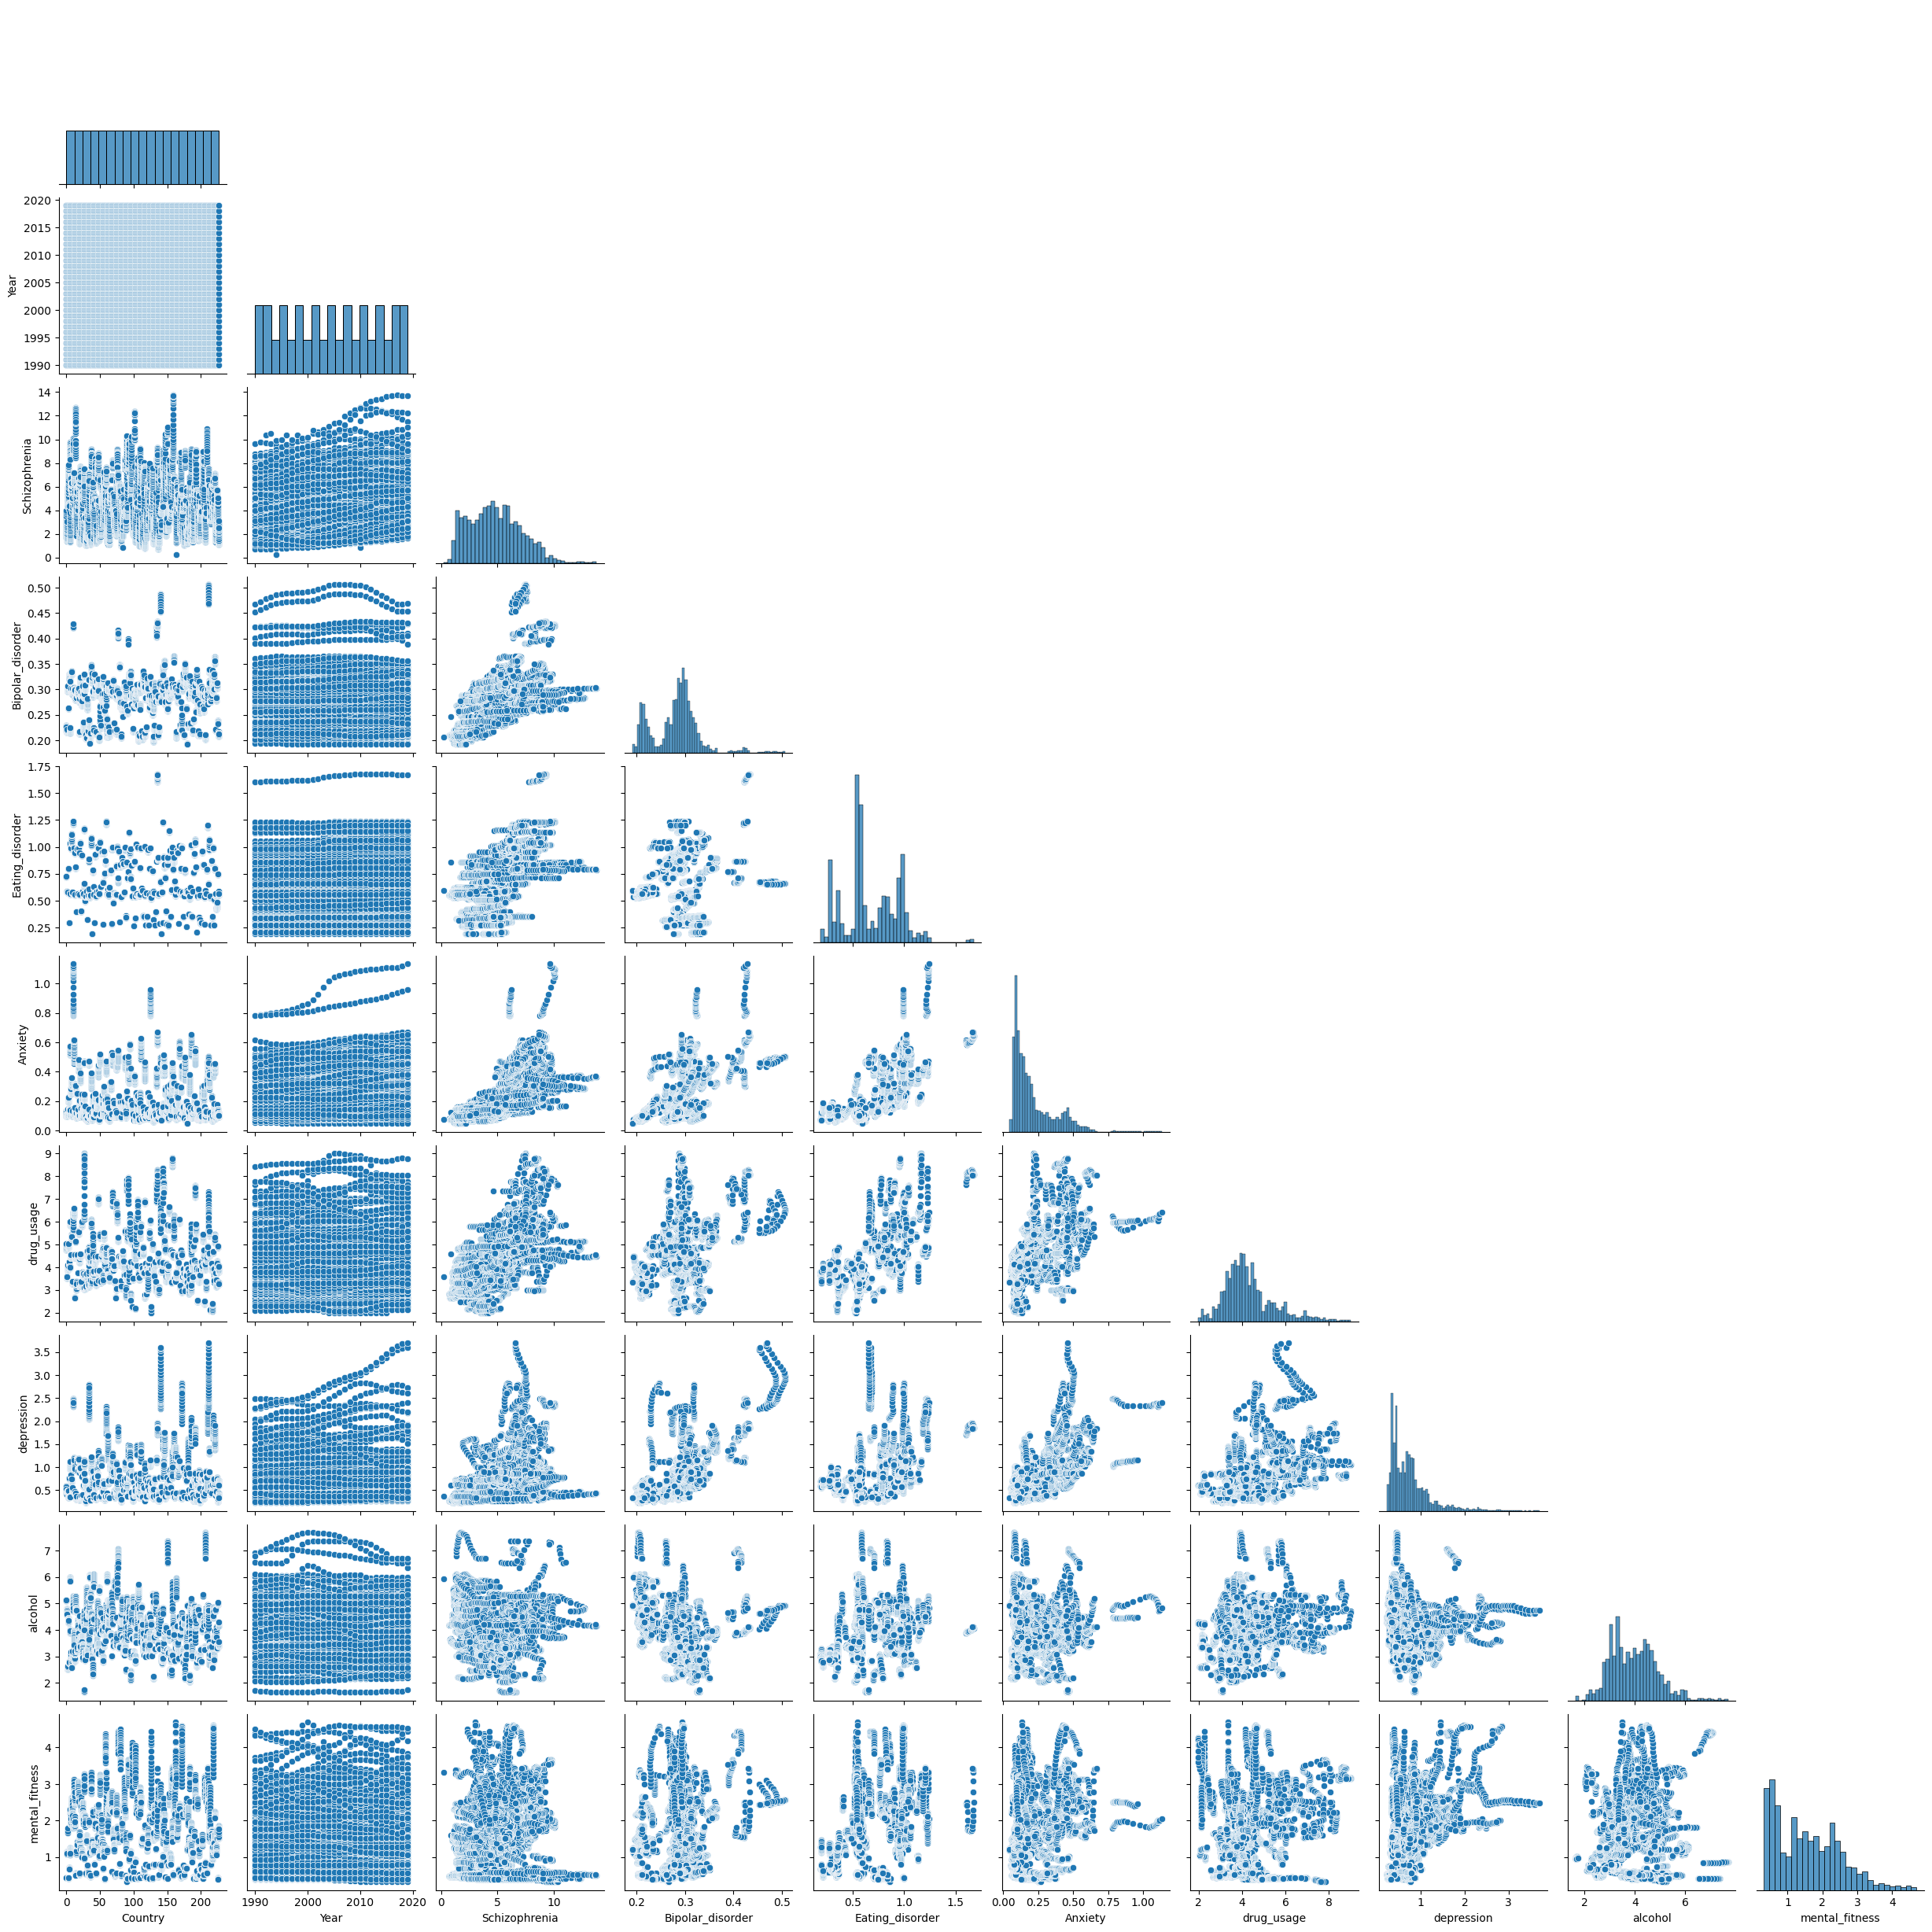

1.5788071625382236


LinearRegression Model Performance for Training Set
--------------------------------------
MSE is 0.5768675399745626
RMSE is 0.7595179655377235
R2 score is 0.33581211672302613


LinearRegression Model Performance for Testing Set
--------------------------------------
MSE is 0.5792230513592006
RMSE is 0.7610670478737078
R2 score is 0.3513086903663698



RandomForestRegressor Model Performance for Training Set
--------------------------------------
MSE is 0.0006396686591364634
RMSE is 0.025291671734712664
R2 score is 0.999263504802629


RandomForestRegressor Model Performance for Testing Set
--------------------------------------
MSE is 0.0036697937349657182
RMSE is 0.06057882249570157
R2 score is 0.99589007499195


In [28]:
if __name__ == "__main__":
    # Load and merge the data
    data = load_and_merge_data()

    # Preprocess the data
    data = preprocess_data(data)

    # Visualize the data
    visualize_data(data)

    # Prepare the data for modeling
    X = data.drop('mental_fitness', axis=1)
    y = data['mental_fitness']

    # Linear Regression Model
    from sklearn.linear_model import LinearRegression
    from sklearn.metrics import mean_squared_error, r2_score
    lr = LinearRegression()
    evaluate_model(X, y, lr)

    print("\n\n")

    # Random Forest Regression Model
    from sklearn.ensemble import RandomForestRegressor
    rf = RandomForestRegressor()
    evaluate_model(X, y, rf)